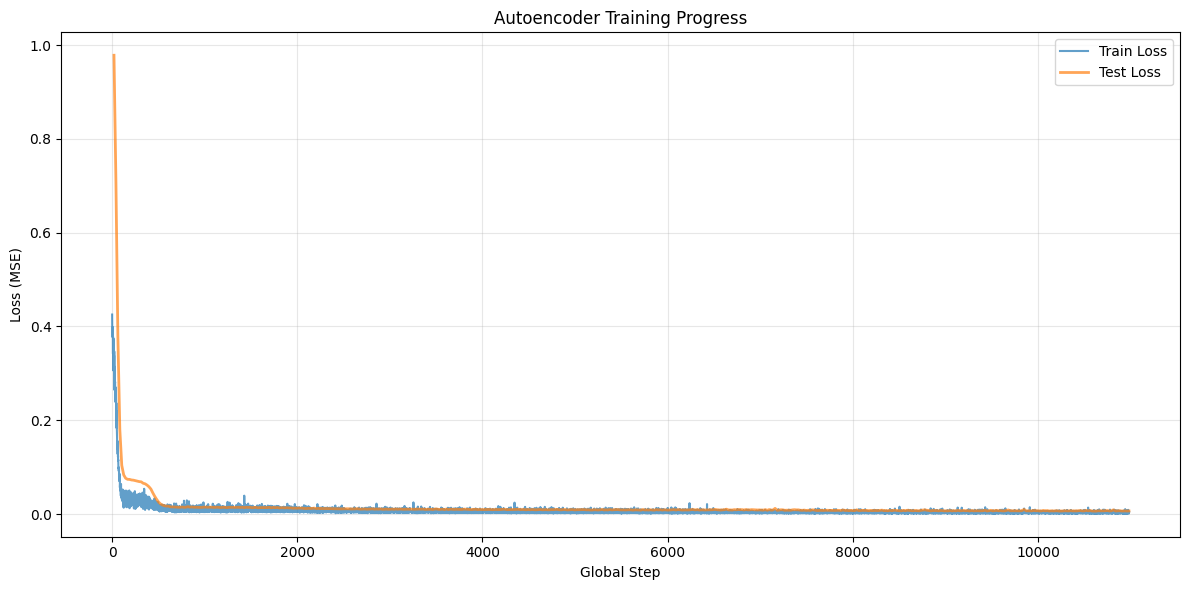

Final Train Loss: 0.004069
Final Test Loss: 0.006622
Min Test Loss: 0.006240 at step 10626


In [3]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
import os

log_dir = 'runs'
run_dirs = [os.path.join(log_dir, d) for d in os.listdir(log_dir) if os.path.isdir(os.path.join(log_dir, d))]
latest_run = max(run_dirs, key=os.path.getmtime) if run_dirs else None

if latest_run:
    ea = event_accumulator.EventAccumulator(latest_run)
    ea.Reload()
    
    train_loss = ea.Scalars('Loss/train')
    test_loss = ea.Scalars('Loss/test')
    
    train_steps = [x.step for x in train_loss]
    train_values = [x.value for x in train_loss]
    test_steps = [x.step for x in test_loss]
    test_values = [x.value for x in test_loss]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(train_steps, train_values, label='Train Loss', alpha=0.7)
    ax.plot(test_steps, test_values, label='Test Loss', alpha=0.7, linewidth=2)
    ax.set_xlabel('Global Step')
    ax.set_ylabel('Loss (MSE)')
    ax.set_title('Autoencoder Training Progress')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Final Train Loss: {train_values[-1]:.6f}")
    print(f"Final Test Loss: {test_values[-1]:.6f}")
    print(f"Min Test Loss: {min(test_values):.6f} at step {test_steps[test_values.index(min(test_values))]}")